# **Proyecto Final Unidad 6 Metodologias Agiles para Proyectos de Machine Learning**
---
##**Presentado por**:  
# Daniel Cardozo

##**Tema**:
# **Aplicación de Deep Learning para la Interpretacion Clínica de Pruebas de Sensibilidad Antimicrobiana (SIR)**


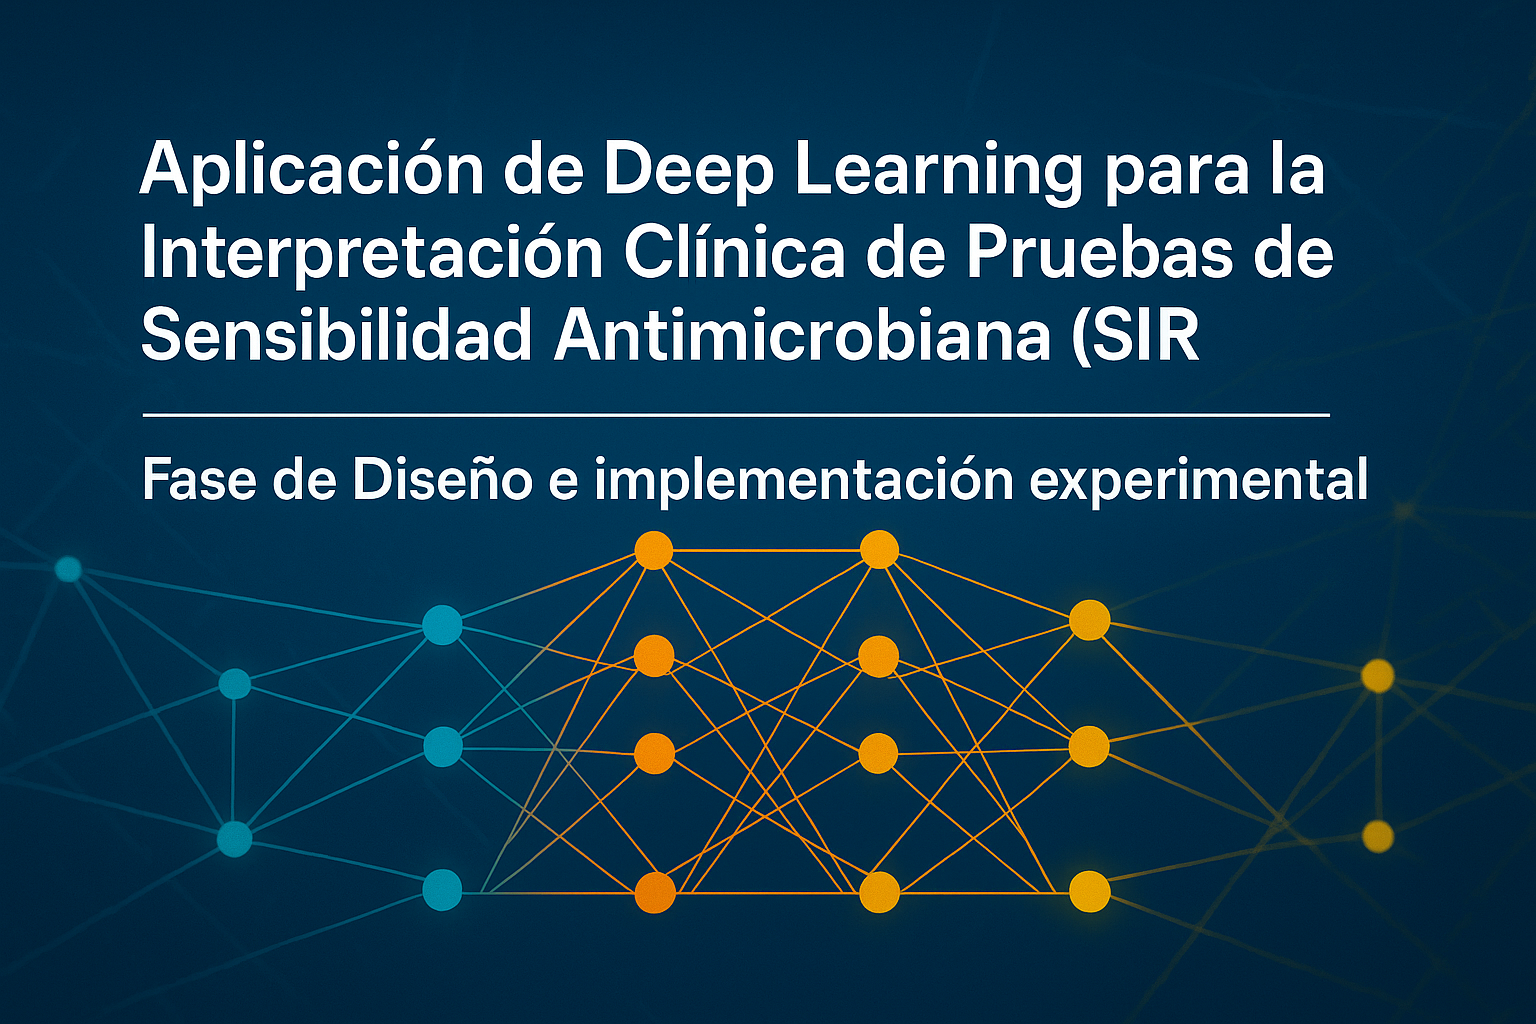

# **3. Diseño e Implementacion Experimental**
---

## **3.1. Particion del conjunto de datos**


---

Si el dataset no tiene por defecto definida una partición en conjuntos de entrenamiento y prueba, hágala usted, en las proporciones que considere oportunas.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving whonet_etiquetas.xlsx to whonet_etiquetas.xlsx


In [ ]:
#Cargamos etiquetas de todos los atb
whonet_df = pd.read_excel('whonet_etiquetas.xlsx',sheet_name='Sheet1')

In [ ]:
whonet_df.head()

,PATIENT_ID,AGE,PAT_TYPE,WARD,DATE_ADMIS,SPEC_NUM,SPEC_DATE,SPEC_TYPE,SPEC_CODE,LOCAL_SPEC,...,Eti_TZP_NM,VAN_NM,Eti_VAN_NM,VOR_NM,Eti_VOR_NM,MX_RX,General3,year,month,key
0,1112231203,2,ped,Uci_Pediatrica,NaN,132238,2019-01-19,sa,12,Sangre,...,NaN,1.0,S,NaN,NaN,Sin_mx_resistencia,Sin_mx_resistencia,2019,1,1112231203-132238-sa-sep-2019-01-19
1,1112231203,2,ped,Uci_Pediatrica,NaN,132239,2019-01-19,sa,12,Sangre,...,NaN,1.0,S,NaN,NaN,Sin_mx_resistencia,Sin_mx_resistencia,2019,1,1112231203-132239-sa-sep-2019-01-19
2,CC29568816,42,adu,Hospitalizacion,NaN,21093000091-,2021-09-30,bl,85,Bolsa articular,...,NaN,NaN,NaN,12.0,12.0,Sin_mx_resistencia,Sin_mx_resistencia,2021,9,CC29568816-21093000091--bl-crs-2021-09-30
3,CC10214771,70,adu,Urgencias,NaN,19061600294-,2019-06-18,or,11,Orina,...,S,NaN,NaN,NaN,NaN,Sin_mx_resistencia,Sin_mx_resistencia,2019,6,CC10214771-19061600294--or-eco-2019-06-18
4,CC1037070958,30,adu,Urgencias,NaN,19062400156-,2019-06-27,he,41,Heces,...,4.0,NaN,NaN,NaN,NaN,Sin_mx_resistencia,Sin_mx_resistencia,2019,6,CC1037070958-19062400156--he-sal-2019-06-27


In [ ]:
whonet_df.columns

Index(['PATIENT_ID', 'AGE', 'PAT_TYPE', 'WARD', 'DATE_ADMIS', 'SPEC_NUM',
       'SPEC_DATE', 'SPEC_TYPE', 'SPEC_CODE', 'LOCAL_SPEC',
       ...
       'Eti_TZP_NM', 'VAN_NM', 'Eti_VAN_NM', 'VOR_NM', 'Eti_VOR_NM', 'MX_RX',
       'General3', 'year', 'month', 'key'],
      dtype='object', length=110)

In [ ]:
atb  = [
  "AMK_NM","Eti_AMK_NM", # Amikacina
  "AMP_NM","Eti_AMP_NM", # Anfotericina B
  "ATM_NM","Eti_ATM_NM", # Aztreonam
  "CAS_NM","Eti_CAS_NM", # Caspofungina
  "CAZ_NM","Eti_CAZ_NM", # Ceftazidima
  "CIP_NM","Eti_CIP_NM", # Ciprofloxacina
  "CLI_NM","Eti_CLI_NM", # Clindamicina
  "CPT_NM","Eti_CPT_NM", # Ceftarolina
  "CRO_NM","Eti_CRO_NM", # Ceftriaxona
  "CTX_NM","Eti_CTX_NM", # Cefotaxima
  "CZA_NM","Eti_CZA_NM", # Ceftazidima/Avibactam
  "CZO_NM","Eti_CZO_NM", # Cefazolina
  "CZT_NM","Eti_CZT_NM", # Ceftolozane/Tazobactam
  "DAP_NM","Eti_DAP_NM", # Daptomocina
  "ERY_NM","Eti_ERY_NM", # Eritromicina
  "ETP_NM","Eti_ETP_NM", # Ertapenem
  "FEP_NM","Eti_FEP_NM", # Cefepime
  "FLU_NM","Eti_FLU_NM", # Fluconazol
  "FOS_NM","Eti_FOS_NM", # Fosfomicina
  "FOX_NM","Eti_FOX_NM", # Cefoxitina
  "GEH_NM","Eti_GEH_NM", # Gentamicina
  "GEN_NM","Eti_GEN_NM", # Gentamicina
  "IPM_NM","Eti_IPM_NM", # Imipenem
  "LNZ_NM","Eti_LNZ_NM", # Linezolid
  "LVX_NM","Eti_LVX_NM", # Levofloxacina
  "MEM_NM","Eti_MEM_NM", # Meropenem
  "MFX_NM","Eti_MFX_NM", # Moxifloxacina
  "MIF_NM","Eti_MIF_NM", # Micafungina
  "NIT_NM","Eti_NIT_NM", # Nitrofurantoina
  "NOR_NM","Eti_NOR_NM", # Norfloxacina
  "OXA_NM","Eti_OXA_NM", # Oxacilina
  "PEN_NM","Eti_PEN_NM", # Penicilina
  "RIF_NM","Eti_RIF_NM", # Rifanpicina.
  "SAM_NM","Eti_SAM_NM", # Ampicilina/Sulbactam
  "STH_NM","Eti_STH_NM", #
  "SXT_NM","Eti_SXT_NM", # Trimetropina/Sulfametoxazol
  "TCY_NM","Eti_TCY_NM", # Tetraciclina
  "TGC_NM","Eti_TGC_NM", # Tigeciclina
  "TZP_NM","Eti_TZP_NM", # Piperacilina/Tazobactam
  "VAN_NM","Eti_VAN_NM", # Vancomicina
  "VOR_NM","Eti_VOR_NM", # Voriconazol
]
print(type(atb))
print(len(atb))

<class 'list'>
82


In [ ]:
#Limpiamos dataframe para cada antibiotico y creamos una lista de dataframe de dataframe para ingresar entrenar el modelo

dataframes_whonet = {} # diccionario de dataframes
conteo=0
for i in range(len(atb)):

  if i < 41: # la mitad del total de atb validos

    whonet_temp = []
    nombre = f'whonet_{atb[conteo]}'
    nombre_atb = atb[conteo]
    nombre_etiquetas = atb[conteo+1]
    #print(f'{nombre} -{nombre_atb} -{nombre_etiquetas} ')

    whonet_temp = whonet_df[['LOCAL_ORG', nombre_atb , nombre_etiquetas]]
    #Eliminamos los valores de las etiquetas numericos o vacios
    whonet_temp.loc[:, nombre_etiquetas] = whonet_temp[nombre_etiquetas].apply(lambda x: x if x in ["S", "R", "I"] else np.nan)
    whonet_temp = whonet_temp.dropna()

    dataframes_whonet[nombre] = whonet_temp

    conteo=conteo+2
  else:
    break

In [ ]:
dataframes_whonet['whonet_AMK_NM']

,LOCAL_ORG,AMK_NM,Eti_AMK_NM
3,Escherichia coli,2.0,S
5,Escherichia coli,4.0,S
6,Escherichia coli,4.0,S
7,Escherichia coli,4.0,S
11,Escherichia coli,2.0,S
...,...,...,...
50176,Klebsiella pneumoniae ss. pneumoniae,2.0,S
50177,Klebsiella pneumoniae ss. pneumoniae,2.0,S
50178,Klebsiella pneumoniae ss. pneumoniae,2.0,S
50180,Escherichia coli,2.0,S


In [ ]:
# Acceder a nombres y DataFrames y borramos atb sin informacion despues de limpieza
for nombre, df in dataframes_whonet.items():
    if len(df)<1000:
      print(f"Nombre: {nombre}, Filas: {len(df)}")
    else:
      None

Nombre: whonet_MFX_NM, Filas: 501


In [ ]:
#Eliminamos dataframe sin registros o bajo numero de registros
#dataframes_whonet.pop('whonet_CHL_NM')
#dataframes_whonet.pop('whonet_MCZ_NM')
dataframes_whonet.pop('whonet_GEH_NM')
dataframes_whonet.pop('whonet_STH_NM')
dataframes_whonet.pop('whonet_MFX_NM')

,LOCAL_ORG,MFX_NM,Eti_MFX_NM
0,Staphylococcus epidermidis,2.00,R
1,Staphylococcus epidermidis,2.00,R
2228,Streptococcus pneumoniae,0.12,S
2229,Streptococcus pneumoniae,0.12,S
2230,Streptococcus pneumoniae,0.12,S
...,...,...,...
50123,Staphylococcus aureus ss. aureus,0.25,S
50136,Staphylococcus aureus ss. aureus,0.25,S
50137,Staphylococcus aureus ss. aureus,0.25,S
50160,Staphylococcus aureus ss. aureus,0.25,S


In [ ]:
# Visualizamos dataframes finales por cada atb
for nombre, df in dataframes_whonet.items():
  print(f"Nombre: {nombre}, Filas: {len(df)}")

Nombre: whonet_AMK_NM, Filas: 32668
Nombre: whonet_AMP_NM, Filas: 7731
Nombre: whonet_ATM_NM, Filas: 9429
Nombre: whonet_CAS_NM, Filas: 4187
Nombre: whonet_CAZ_NM, Filas: 32650
Nombre: whonet_CIP_NM, Filas: 43084
Nombre: whonet_CLI_NM, Filas: 5436
Nombre: whonet_CPT_NM, Filas: 2750
Nombre: whonet_CRO_NM, Filas: 19986
Nombre: whonet_CTX_NM, Filas: 4926
Nombre: whonet_CZA_NM, Filas: 9674
Nombre: whonet_CZO_NM, Filas: 9447
Nombre: whonet_CZT_NM, Filas: 9804
Nombre: whonet_DAP_NM, Filas: 2402
Nombre: whonet_ERY_NM, Filas: 11116
Nombre: whonet_ETP_NM, Filas: 27692
Nombre: whonet_FEP_NM, Filas: 32293
Nombre: whonet_FLU_NM, Filas: 3972
Nombre: whonet_FOS_NM, Filas: 9385
Nombre: whonet_FOX_NM, Filas: 5731
Nombre: whonet_GEN_NM, Filas: 25397
Nombre: whonet_IPM_NM, Filas: 17039
Nombre: whonet_LNZ_NM, Filas: 10388
Nombre: whonet_LVX_NM, Filas: 7735
Nombre: whonet_MEM_NM, Filas: 33066
Nombre: whonet_MIF_NM, Filas: 4501
Nombre: whonet_NIT_NM, Filas: 23337
Nombre: whonet_NOR_NM, Filas: 14006
Nombre:

In [ ]:
#Visualizamos el contenido de una de los dataframes de atb con mayor numero de registros, en este caso Merepenem
df= dataframes_whonet['whonet_MEM_NM']
df

,LOCAL_ORG,MEM_NM,Eti_MEM_NM
3,Escherichia coli,0.25,S
4,Salmonella sp.,0.25,S
5,Escherichia coli,0.25,S
6,Escherichia coli,0.25,S
7,Escherichia coli,0.25,S
...,...,...,...
50176,Klebsiella pneumoniae ss. pneumoniae,8.00,R
50177,Klebsiella pneumoniae ss. pneumoniae,8.00,R
50178,Klebsiella pneumoniae ss. pneumoniae,8.00,R
50180,Escherichia coli,0.25,S


In [ ]:
## **Cargue de Librerias**
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
#Construimos nuestras particiones de X y y, para entrenar nuestros modelo
# Se aplica el Encoderlabel para reemplazar valores categorias por valores numericos y facilitar el entrenamiento del modelo.

X_list = {}
y_list = {}

le_organismo = LabelEncoder()
le_etiquetas = LabelEncoder()

for nombre, df in dataframes_whonet.items():
    # Seleccionar por nombre usando posición
  col1 = df.columns[0]
  col2 = df.columns[1]
  col_target = df.columns[2]

  X = df[[col1, col2]] # Valores de microorganismos sin codificar
  X.loc[:,'LOCAL_ORG'] = le_organismo.fit_transform(X['LOCAL_ORG']) #Reemplaza nombres de microorganimos por valores numericos.

  y = df[col_target] # Valores de etiquetas de resistencia sin codificar
  y = le_etiquetas.fit_transform(y) #Reemplaza valores S,I,R a 0, 1, 2

  X_list[nombre] = X
  y_list[nombre] = y

In [ ]:
#Ejemplo de visualizacion Meropenem
print("Ejemplo particion X MEM_NM")
print(X_list['whonet_MEM_NM'].head())
print(X_list['whonet_MEM_NM'].shape)
print("Ejemplo particion y MEM_NM")
#print(y_list['whonet_MEM_NM'].head())
print(y_list['whonet_MEM_NM'].shape)
print(np.unique(y))

Ejemplo particion X MEM_NM
  LOCAL_ORG  MEM_NM
3        24    0.25
4        58    0.25
5        24    0.25
6        24    0.25
7        24    0.25
(33066, 2)
Ejemplo particion y MEM_NM
(33066,)
[0 1 2]


In [ ]:
# Listas para almacenar resultados
X_train_list = {}
X_test_list = {}
y_train_list = {}
y_test_list = {}

for nombre in X_list:
    X = X_list[nombre]
    y = y_list[nombre]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_list[nombre] = X_train
    X_test_list[nombre] = X_test
    y_train_list[nombre] = y_train
    y_test_list[nombre] = y_test

In [ ]:
print(f"Datos de Train X {X_train_list['whonet_MEM_NM'].shape}")
print(f"Datos de Test y {y_train_list['whonet_MEM_NM'].shape}")

print(f"Datos de Test X {X_test_list['whonet_MEM_NM'].shape}")
print(f"Datos de Test y {y_test_list['whonet_MEM_NM'].shape}")


Datos de Train X (26452, 2)
Datos de Test y (26452,)
Datos de Test X (6614, 2)
Datos de Test y (6614,)


In [ ]:
#Calculo de pesos para ponderacion de clases en la funcion de perdida y darle manejo al desbalance de clases usando  la class_weight o ponderacion de clases en la funcion de perdida, agregando mas peso a los errores en las clases minoritarias.
class_weights_list = {}

for nombre, y in y_train_list.items():
    classes = np.unique(y)
    class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y)

    # Convertir a diccionario {clase: peso}
    class_weights_dict = dict(zip(classes, class_weights))

    class_weights_list[nombre] = class_weights_dict
    print(f"Pesos por clase para {nombre}': {class_weights_dict}")


Pesos por clase para whonet_AMK_NM': {np.int64(0): np.float64(30.45920745920746), np.int64(1): np.float64(6.859317585301837), np.int64(2): np.float64(0.3544362166707353)}
Pesos por clase para whonet_AMP_NM': {np.int64(0): np.float64(45.80740740740741), np.int64(1): np.float64(0.8628435886702944), np.int64(2): np.float64(0.5496888888888889)}
Pesos por clase para whonet_ATM_NM': {np.int64(0): np.float64(89.79761904761905), np.int64(1): np.float64(2.05084284937466), np.int64(2): np.float64(0.3997985901309164)}
Pesos por clase para whonet_CAS_NM': {np.int64(0): np.float64(27.908333333333335), np.int64(1): np.float64(50.74242424242424), np.int64(2): np.float64(0.33962072812088023)}
Pesos por clase para whonet_CAZ_NM': {np.int64(0): np.float64(7.460725506998001), np.int64(1): np.float64(2.6312078170645714), np.int64(2): np.float64(0.4022669870017865)}
Pesos por clase para whonet_CIP_NM': {np.int64(0): np.float64(4.56456098529996), np.int64(1): np.float64(1.3873928269532665), np.int64(2): np.

In [ ]:
#Revision del contenido de los pesos para cada atb
class_weights_list

{'whonet_AMK_NM': {np.int64(0): np.float64(30.45920745920746),
  np.int64(1): np.float64(6.859317585301837),
  np.int64(2): np.float64(0.3544362166707353)},
 'whonet_AMP_NM': {np.int64(0): np.float64(45.80740740740741),
  np.int64(1): np.float64(0.8628435886702944),
  np.int64(2): np.float64(0.5496888888888889)},
 'whonet_ATM_NM': {np.int64(0): np.float64(89.79761904761905),
  np.int64(1): np.float64(2.05084284937466),
  np.int64(2): np.float64(0.3997985901309164)},
 'whonet_CAS_NM': {np.int64(0): np.float64(27.908333333333335),
  np.int64(1): np.float64(50.74242424242424),
  np.int64(2): np.float64(0.33962072812088023)},
 'whonet_CAZ_NM': {np.int64(0): np.float64(7.460725506998001),
  np.int64(1): np.float64(2.6312078170645714),
  np.int64(2): np.float64(0.4022669870017865)},
 'whonet_CIP_NM': {np.int64(0): np.float64(4.56456098529996),
  np.int64(1): np.float64(1.3873928269532665),
  np.int64(2): np.float64(0.485402847606574)},
 'whonet_CLI_NM': {np.int64(0): np.float64(103.523809523

In [ ]:
# Para evitar errores por el uso  np.int64 y np.float64 hay que transformarlos a dict[str, dict[int, float]]
class_weights_list_fixed = {
    salida: {int(k): float(v) for k, v in pesos.items()}
    for salida, pesos in class_weights_list.items()
}

In [ ]:
#Validamos que la estructura se a correcta
for salida, pesos in class_weights_list_fixed.items():
    print(salida, "=>", {type(k): type(v) for k, v in pesos.items()})

whonet_AMK_NM => {<class 'int'>: <class 'float'>}
whonet_AMP_NM => {<class 'int'>: <class 'float'>}
whonet_ATM_NM => {<class 'int'>: <class 'float'>}
whonet_CAS_NM => {<class 'int'>: <class 'float'>}
whonet_CAZ_NM => {<class 'int'>: <class 'float'>}
whonet_CIP_NM => {<class 'int'>: <class 'float'>}
whonet_CLI_NM => {<class 'int'>: <class 'float'>}
whonet_CPT_NM => {<class 'int'>: <class 'float'>}
whonet_CRO_NM => {<class 'int'>: <class 'float'>}
whonet_CTX_NM => {<class 'int'>: <class 'float'>}
whonet_CZA_NM => {<class 'int'>: <class 'float'>}
whonet_CZO_NM => {<class 'int'>: <class 'float'>}
whonet_CZT_NM => {<class 'int'>: <class 'float'>}
whonet_DAP_NM => {<class 'int'>: <class 'float'>}
whonet_ERY_NM => {<class 'int'>: <class 'float'>}
whonet_ETP_NM => {<class 'int'>: <class 'float'>}
whonet_FEP_NM => {<class 'int'>: <class 'float'>}
whonet_FLU_NM => {<class 'int'>: <class 'float'>}
whonet_FOS_NM => {<class 'int'>: <class 'float'>}
whonet_FOX_NM => {<class 'int'>: <class 'float'>}


## **3.2. Selección y diseño de modelos**
---

Seleccione el/los modelo/s a explorar para aplicar sobre el conjunto de datos. Recuerde, la selección del modelo está influenciada por diferentes factores. Si el problema es de análisis de imagen, muy seguramente hay que explorar diversas redes neuronales convolucionales. Si el problema está relacionado con NLP, muy seguramente hay que explorar modelos basados en Tranformers.

Además, debe definir cuál es su problema:

- **Regresión**: se busca estimar un valor continúo a partir de los datos.
- **Clasificación**: permite estimar un valor categórico a partir de los datos.
- **Agrupamiento**: permite encontrar grupos de datos similares.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas.

En cualquier caso los profundos disponibles en _TensorFlow_ constituyen una base sobre la que usted debe definir un clasificador/regresor/_encoder_/_decoder_ final, compuesto de una o más capas densas, con opción de incluir _dropout_ o capas de normalización.

Justifique la escogencia y diseño de los modelos a explorar:

---**INGRESE SU RESPUESTA**---

La resistencia antimicrobiana es el resultado de interacciones complejas entre múltiples factores: genéticos, fenotípicos, ambientales y clínicos. Los modelos tradicionales (como regresión logística o árboles de decisión) tienen dificultades para capturar estas relaciones no lineales. Los modelos de deep learning, especialmente las redes neuronales profundas, están diseñados para aprender este tipo de patrones complejos y poder predecir la clasificación de mecanismos de resistencia. La clasificación de RAM puede involucrar múltiples clases (Sensible, Intermedio, Resistente) o incluso predicciones simultáneas para diferentes antibióticos. Las arquitecturas de clasificación de deep learning permiten este tipo de escenarios de forma natural.
En algunos casos, se podria predecir resistencia usando imágenes (cultivos, antibiogramas), secuencias genéticas o texto clínico libre. En estos contextos, técnicas de deep learning como CNNs o transformers permiten trabajar directamente con datos no estructurados, sin requerir una transformación previa compleja. No obstamte, en nuestro caso, utilizamos datos de cultivos ya procesados consignados en una base de datos por lo cual el uso de un modleo de deep learning para clasificacion en prediccion de resistencia antimicrobina esta plenamente justificado debido a su capacidad para aprneder relaciones complejas.



## **3.3 Implementación de los modelos**
---

Implemente los modelos descritos anteriormente usando herramientas de _TensorFlow_. Recuerde que puede aplicar técnicas de aumentación de datos, si es necesario.

In [ ]:
## **Cargue de Librerias**
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


### Busqueda de Hiperparametros
Para la busqueda de hiperparametros utilizaremos **Optuna**, libreria de optimizacion bayesina, mucho mas eficiente que GridSearchCV

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 23.0 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

In [ ]:
#Creamos la bd del modelo inicial para atb a predecir
whonet_temp = whonet_df[['LOCAL_ORG', 'MEM_NM', 'Eti_MEM_NM']]
#Eliminamos los valores de las etiquetas numericos o vacios
whonet_temp['Eti_MEM_NM']=whonet_temp['Eti_MEM_NM'].apply(lambda x: x if x in ["S", "R", "I"] else np.nan)
whonet_temp = whonet_temp.dropna()
print(whonet_temp.head())
print(whonet_temp.shape)

          LOCAL_ORG  MEM_NM Eti_MEM_NM
3  Escherichia coli    0.25          S
4    Salmonella sp.    0.25          S
5  Escherichia coli    0.25          S
6  Escherichia coli    0.25          S
7  Escherichia coli    0.25          S
(33066, 3)


<ipython-input-26-1902397258>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whonet_temp['Eti_MEM_NM']=whonet_temp['Eti_MEM_NM'].apply(lambda x: x if x in ["S", "R", "I"] else np.nan)


In [ ]:
# Construimos nuestras participnes
X = whonet_temp[['LOCAL_ORG', 'MEM_NM']]  # todas las columnas excepto la columna objetivo
y = whonet_temp['Eti_MEM_NM']
print(X.head())
print(X.shape)
print(y.shape)
print(np.unique(y))


          LOCAL_ORG  MEM_NM
3  Escherichia coli    0.25
4    Salmonella sp.    0.25
5  Escherichia coli    0.25
6  Escherichia coli    0.25
7  Escherichia coli    0.25
(33066, 2)
(33066,)
['I' 'R' 'S']


In [ ]:
# Codificamos la  columna con informacion de microorganismos al igual que la informacion de las etiquetas.
# Hacemos la codificacion antes  de dividir en training, validation y test
le_organismo = LabelEncoder()
X['LOCAL_ORG_id'] = le_organismo.fit_transform(X['LOCAL_ORG'])
print(X['LOCAL_ORG_id'].unique())

le_etiquetas = LabelEncoder()
y_encoded = le_etiquetas.fit_transform(y)
print(np.unique(y_encoded))

[24 58 40 30 46 23 14 61 63 29 28 39 59  7 34 15 33 44  2  9 17 51 41 38
 13  5  6 42 52 21 12 48 45  4  1 49  0 10 11 19 26 60 16 57 62 22 55 47
 20 36  3 31 53 35 27 18  8 65 25 56 32 64 43 50 54 37]
[0 1 2]


In [ ]:
#creamos nuestros datos de entramiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [ ]:
#Calculo de pesos para ponderacion de clases en la funcion de perdida y darle manejo al desbalance de clases usando  la class_weight o ponderacion de clases en la funcion de perdida, agregando mas peso a los errores en las clases minoritarias.

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
print("Pesos por clase:", class_weights_dict)

Pesos por clase: {0: np.float64(49.81544256120527), 1: np.float64(4.334972140281875), 2: np.float64(0.3637363695117088)}


In [ ]:
# Definir la función objetivo para Optuna
def objective(trial):
    # Hiperparámetros que probará Optuna
    n_layers = trial.suggest_int("n_layers", 1, 10)
    n_neurons = trial.suggest_categorical("n_neurons", [32, 64, 128, 256, 512])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1 ,0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "nadam"])
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    epochs = 50  # puedes cambiarlo si quieres

    # Parámetros
    num_micro = num_micro = X['LOCAL_ORG_id'].max() + 1
    embedding_dim = 8
    num_clases = len(np.unique(y_train))


    # Entradas
    input_micro = Input(shape=(1,), name='LOCAL_ORG')
    embedding_micro = Embedding(input_dim=num_micro, output_dim=embedding_dim)(input_micro)
    embedding_micro = Flatten()(embedding_micro)

    input_atb = Input(shape=(1,), name='MEM_NM')

    # Concatenar
    x = Concatenate()([embedding_micro, input_atb])

    # Construir modelo
   #model.add(Dense(n_neurons, input_dim=num_micro, activation='relu'))
    for _ in range(n_layers - 1):
        x = Dense(n_neurons, activation='relu')(x)
        x =Dropout(dropout_rate)(x)
        x = BatchNormalization()(x)
        x = Dense(n_neurons, activation='relu')(x)


    output = Dense(num_clases, activation='softmax')(x)


    # Elegir optimizador
    optimizers = {
        "adam": Adam(learning_rate=learning_rate),
        "rmsprop": RMSprop(learning_rate=learning_rate),
        "nadam": Nadam(learning_rate=learning_rate)
        }
    model = Model(inputs=[input_micro, input_atb], outputs=output)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers[optimizer_name], metrics=['accuracy'])

    # Entrenar el modelo

    history = model.fit( x={'LOCAL_ORG': X_train['LOCAL_ORG_id'], 'MEM_NM': X_train['MEM_NM']},
      y = y_train,  # enteros: 0, 1, 2
      epochs=epochs,
      batch_size=batch_size, #32
      class_weight=class_weights_dict,
      validation_split=0.3,
      verbose=1)

    # Usar el accuracy de validación como métrica objetivo
    val_accuracy = max(history.history['val_accuracy'])
    return val_accuracy

# Crear y ejecutar el estudio
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Puedes aumentar el número de trials

# Mostrar mejores parámetros
print("Mejores hiperparámetros encontrados:")
print(study.best_trial.params)
print("Accuracy de validación:", study.best_value)


[I 2025-06-13 19:23:02,015] A new study created in memory with name: no-name-2ceeb24c-ee0a-4eb4-a7d3-627949e7e776
<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8457 - loss: 2.3323 - val_accuracy: 0.9855 - val_loss: 0.1270
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8692 - loss: 0.8318 - val_accuracy: 0.8635 - val_loss: 0.3497
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8606 - loss: 0.6064 - val_accuracy: 0.4568 - val_loss: 0.8546
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6632 - loss: 0.7995 - val_accuracy: 0.8927 - val_loss: 0.3712
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7013 - loss: 0.7930 - val_accuracy: 0.6711 - val_loss: 0.3965
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7113 - loss: 0.6262 - val_accuracy: 0.9708 - val_loss: 0.2502
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9253 - loss: 0.5914 - val_accuracy: 0.6745 - val_loss: 0.3388
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8933 - loss: 0.7025 - val_accuracy: 

[I 2025-06-13 19:24:49,000] Trial 0 finished with value: 0.9914551973342896 and parameters: {'n_layers': 4, 'n_neurons': 256, 'dropout_rate': 0.21918919260562564, 'learning_rate': 0.026909145909912457, 'optimizer': 'nadam', 'batch_size': 64}. Best is trial 0 with value: 0.9914551973342896.
<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.4733 - loss: 2.4956 - val_accuracy: 0.1941 - val_loss: 1.4410
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4718 - loss: 1.2162 - val_accuracy: 0.0491 - val_loss: 1.0149
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1803 - loss: 1.1294 - val_accuracy: 0.0112 - val_loss: 1.1067
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1459 - loss: 1.1012 - val_accuracy: 0.0491 - val_loss: 1.0516
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3127 - loss: 1.0810 - val_accuracy: 0.0112 - val_loss: 1.0655
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1459 - loss: 1.1076 - val_accuracy: 0.0112 - val_loss: 1.1434
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0659 - loss: 1.1499 - val_accuracy: 0.9397 - val_loss: 1.0281
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5345 - loss: 1.0637 - val_accuracy:

[I 2025-06-13 19:27:26,811] Trial 1 finished with value: 0.93967604637146 and parameters: {'n_layers': 10, 'n_neurons': 256, 'dropout_rate': 0.42496126995751227, 'learning_rate': 0.04240891360333264, 'optimizer': 'nadam', 'batch_size': 64}. Best is trial 0 with value: 0.9914551973342896.
<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


Epoch 1/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.5904 - loss: 1.2503 - val_accuracy: 0.9762 - val_loss: 0.0679
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7465 - loss: 0.7867 - val_accuracy: 0.9829 - val_loss: 0.1049
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7719 - loss: 0.8060 - val_accuracy: 0.9830 - val_loss: 0.0934
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7717 - loss: 0.7470 - val_accuracy: 0.9762 - val_loss: 0.0669
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7576 - loss: 0.9131 - val_accuracy: 0.9306 - val_loss: 0.5962
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8060 - loss: 0.7382 - val_accuracy: 0.9830 - val_loss: 0.0876
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8505 - loss: 0.7598 - val_accuracy: 0.9810 - val_loss: 0.3724
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8355 - loss: 0.78

[I 2025-06-13 19:34:29,161] Trial 2 finished with value: 0.9830378890037537 and parameters: {'n_layers': 8, 'n_neurons': 128, 'dropout_rate': 0.4662077429833269, 'learning_rate': 0.0059655101274451745, 'optimizer': 'adam', 'batch_size': 16}. Best is trial 0 with value: 0.9914551973342896.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.8336 - loss: 0.8541 - val_accuracy: 0.9852 - val_loss: 0.0798
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.5942 - val_accuracy: 0.9855 - val_loss: 0.0696
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8662 - loss: 0.5069 - val_accuracy: 0.9852 - val_loss: 0.1220
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9023 - loss: 0.4793 - val_accuracy: 0.9621 - val_loss: 0.1502
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8749 - loss: 0.5116 - val_accuracy: 0.9890 - val_loss: 0.0657
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9174 - loss: 0.4835 - val_accuracy: 0.9893 - val_loss: 0.0564
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9088 - loss: 0.4064 - val_accuracy: 0.9821 - val_loss: 0.0764
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9398 - loss: 0.4274 - val_accuracy: 0.9721 - va

[I 2025-06-13 19:35:52,362] Trial 3 finished with value: 0.9923478960990906 and parameters: {'n_layers': 4, 'n_neurons': 64, 'dropout_rate': 0.3493633271182631, 'learning_rate': 0.012242320332511639, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 3 with value: 0.9923478960990906.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


572/572 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8349 - loss: 3.6956 - val_accuracy: 0.9883 - val_loss: 0.1282
Epoch 2/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8077 - loss: 2.9009 - val_accuracy: 0.9823 - val_loss: 0.1819
Epoch 3/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8437 - loss: 3.0758 - val_accuracy: 0.8459 - val_loss: 3.3682
Epoch 4/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8783 - loss: 4.8829 - val_accuracy: 0.9773 - val_loss: 0.3548
Epoch 5/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8997 - loss: 3.1905 - val_accuracy: 0.9440 - val_loss: 0.9203
Epoch 6/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8927 - loss: 5.4815 - val_accuracy: 0.9624 - val_loss: 0.4609
Epoch 7/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9231 - loss: 4.2812 - val_accuracy: 0.9801 - val_loss: 0.4737
Epoch 8/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9390 - loss: 5.6541 - val_accuracy: 0.2852 - va

[I 2025-06-13 19:39:30,674] Trial 4 finished with value: 0.9961739778518677 and parameters: {'n_layers': 5, 'n_neurons': 256, 'dropout_rate': 0.28309724758896115, 'learning_rate': 0.01449125826918707, 'optimizer': 'rmsprop', 'batch_size': 32}. Best is trial 4 with value: 0.9961739778518677.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8401 - loss: 0.8369 - val_accuracy: 0.9855 - val_loss: 0.0871
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9387 - loss: 0.5530 - val_accuracy: 0.9855 - val_loss: 0.0605
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9325 - loss: 0.3807 - val_accuracy: 0.9855 - val_loss: 0.0668
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9470 - loss: 0.3632 - val_accuracy: 0.9801 - val_loss: 0.0676
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9502 - loss: 0.3897 - val_accuracy: 0.9855 - val_loss: 0.0578
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9496 - loss: 0.3573 - val_accuracy: 0.9888 - val_loss: 0.0487
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9706 - loss: 0.2786 - val_accuracy: 0.9858 - val_loss: 0.0360
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9598 - loss: 0.2668 - val_accuracy: 0.9912 - val

[I 2025-06-13 19:40:43,911] Trial 5 finished with value: 0.9975768327713013 and parameters: {'n_layers': 3, 'n_neurons': 256, 'dropout_rate': 0.10912100030255437, 'learning_rate': 0.0005174962100741435, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 5 with value: 0.9975768327713013.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7556 - loss: 0.8516 - val_accuracy: 0.9830 - val_loss: 0.0709
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8555 - loss: 0.6936 - val_accuracy: 0.9830 - val_loss: 0.0648
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8619 - loss: 0.5992 - val_accuracy: 0.9830 - val_loss: 0.0886
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8855 - loss: 0.5679 - val_accuracy: 0.9031 - val_loss: 0.1934
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8819 - loss: 0.4824 - val_accuracy: 0.9698 - val_loss: 0.0881
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9159 - loss: 0.4232 - val_accuracy: 0.9674 - val_loss: 0.0671
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9278 - loss: 0.3512 - val_accuracy: 0.9841 - val_loss: 0.0665
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9281 - loss: 0.3885 - val_accura

[I 2025-06-13 19:45:27,031] Trial 6 finished with value: 0.9970666766166687 and parameters: {'n_layers': 4, 'n_neurons': 256, 'dropout_rate': 0.3492116374361127, 'learning_rate': 0.000372078111592179, 'optimizer': 'nadam', 'batch_size': 16}. Best is trial 5 with value: 0.9975768327713013.
<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7687 - loss: 13.1651 - val_accuracy: 0.8028 - val_loss: 0.4986
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6901 - loss: 3.9515 - val_accuracy: 0.9397 - val_loss: 1.0419
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4602 - loss: 1.0936 - val_accuracy: 0.0491 - val_loss: 1.1408
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2362 - loss: 1.1221 - val_accuracy: 0.0112 - val_loss: 1.1506
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1961 - loss: 1.1072 - val_accuracy: 0.0112 - val_loss: 1.1606
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1495 - loss: 1.1078 - val_accuracy: 0.0112 - val_loss: 1.1114
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1790 - loss: 1.1011 - val_accuracy: 0.0491 - val_loss: 0.9911
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1181 - loss: 1.1102 - val_accuracy

[I 2025-06-13 19:47:58,363] Trial 7 finished with value: 0.93967604637146 and parameters: {'n_layers': 8, 'n_neurons': 512, 'dropout_rate': 0.2860874389082091, 'learning_rate': 0.058838679987916614, 'optimizer': 'nadam', 'batch_size': 64}. Best is trial 5 with value: 0.9975768327713013.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8689 - loss: 2.0415 - val_accuracy: 0.7993 - val_loss: 0.8881
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8812 - loss: 0.7391 - val_accuracy: 0.8004 - val_loss: 0.3627
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9083 - loss: 0.4925 - val_accuracy: 0.9870 - val_loss: 0.0841
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9189 - loss: 0.5061 - val_accuracy: 0.8841 - val_loss: 0.2782
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9250 - loss: 0.3764 - val_accuracy: 0.8448 - val_loss: 0.3839
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9477 - loss: 0.3431 - val_accuracy: 0.9912 - val_loss: 0.0426
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9651 - loss: 0.2930 - val_accuracy: 0.9912 - val_loss: 0.0372
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9561 - loss: 0.2948 - val_accuracy: 0.9950 - va

[I 2025-06-13 19:49:18,615] Trial 8 finished with value: 0.9973217844963074 and parameters: {'n_layers': 3, 'n_neurons': 512, 'dropout_rate': 0.4613643988637933, 'learning_rate': 0.007309597383781117, 'optimizer': 'nadam', 'batch_size': 64}. Best is trial 5 with value: 0.9975768327713013.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9176 - loss: 3.7280 - val_accuracy: 0.6287 - val_loss: 1.0338
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4291 - loss: 1.6191 - val_accuracy: 0.3417 - val_loss: 1.0040
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3621 - loss: 1.1287 - val_accuracy: 0.5078 - val_loss: 0.8131
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8616 - loss: 0.7834 - val_accuracy: 0.9725 - val_loss: 0.6225
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9731 - loss: 0.6728 - val_accuracy: 0.9733 - val_loss: 0.5029
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9696 - loss: 0.6122 - val_accuracy: 0.9736 - val_loss: 0.4208
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9712 - loss: 0.5743 - val_accuracy: 0.9741 - val_loss: 0.3533
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9715 - loss: 0.5891 - val_accurac

[I 2025-06-13 19:53:14,323] Trial 9 finished with value: 0.9821451306343079 and parameters: {'n_layers': 1, 'n_neurons': 64, 'dropout_rate': 0.3362471280096687, 'learning_rate': 0.00018350133647813412, 'optimizer': 'rmsprop', 'batch_size': 16}. Best is trial 5 with value: 0.9975768327713013.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


572/572 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6955 - loss: 4.7048 - val_accuracy: 0.1831 - val_loss: 1.3643
Epoch 2/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1767 - loss: 0.9646 - val_accuracy: 0.2673 - val_loss: 0.9848
Epoch 3/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4175 - loss: 0.7666 - val_accuracy: 0.8167 - val_loss: 0.7097
Epoch 4/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8441 - loss: 0.6864 - val_accuracy: 0.9628 - val_loss: 0.4664
Epoch 5/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9592 - loss: 0.5601 - val_accuracy: 0.9703 - val_loss: 0.4082
Epoch 6/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9709 - loss: 0.4839 - val_accuracy: 0.9710 - val_loss: 0.3318
Epoch 7/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9729 - loss: 0.4520 - val_accuracy: 0.9786 - val_loss: 0.2822
Epoch 8/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9769 - loss: 0.4008 - val_accuracy: 0.9787 - val_

[I 2025-06-13 19:55:11,764] Trial 10 finished with value: 0.9968116283416748 and parameters: {'n_layers': 1, 'n_neurons': 32, 'dropout_rate': 0.1170069231191417, 'learning_rate': 0.0008883503792072323, 'optimizer': 'adam', 'batch_size': 32}. Best is trial 5 with value: 0.9975768327713013.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8962 - loss: 1.8986 - val_accuracy: 0.9383 - val_loss: 0.2506
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9558 - loss: 0.5868 - val_accuracy: 0.9913 - val_loss: 0.0392
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.2603 - val_accuracy: 0.9441 - val_loss: 0.1140
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9681 - loss: 0.2786 - val_accuracy: 0.9960 - val_loss: 0.0321
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.2309 - val_accuracy: 0.9960 - val_loss: 0.0240
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9837 - loss: 0.2086 - val_accuracy: 0.9964 - val_loss: 0.0231
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9915 - loss: 0.1646 - val_accuracy: 0.9807 - val_loss: 0.0603
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.2502 - val_accuracy: 0.9962 - val

[I 2025-06-13 19:56:21,719] Trial 11 finished with value: 0.9980869889259338 and parameters: {'n_layers': 2, 'n_neurons': 512, 'dropout_rate': 0.11504239820720939, 'learning_rate': 0.0018015069987301626, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 11 with value: 0.9980869889259338.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8947 - loss: 1.5237 - val_accuracy: 0.9693 - val_loss: 0.0822
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9635 - loss: 0.5248 - val_accuracy: 0.9878 - val_loss: 0.0555
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9450 - loss: 0.4298 - val_accuracy: 0.9878 - val_loss: 0.0448
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9656 - loss: 0.3028 - val_accuracy: 0.9918 - val_loss: 0.0266
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9685 - loss: 0.2844 - val_accuracy: 0.9913 - val_loss: 0.0273
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9854 - loss: 0.1976 - val_accuracy: 0.9963 - val_loss: 0.0242
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9758 - loss: 0.1702 - val_accuracy: 0.9759 - val_loss: 0.0392
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9814 - loss: 0.2112 - val_accuracy: 0.9918 - val_

[I 2025-06-13 19:57:32,168] Trial 12 finished with value: 0.9975768327713013 and parameters: {'n_layers': 2, 'n_neurons': 512, 'dropout_rate': 0.1180515243200857, 'learning_rate': 0.0015251185836495337, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 11 with value: 0.9980869889259338.
<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8086 - loss: 0.8518 - val_accuracy: 0.9855 - val_loss: 0.0630
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8989 - loss: 0.4407 - val_accuracy: 0.9698 - val_loss: 0.1487
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8826 - loss: 0.4658 - val_accuracy: 0.9855 - val_loss: 0.0586
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9361 - loss: 0.3671 - val_accuracy: 0.9855 - val_loss: 0.0714
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9478 - loss: 0.3603 - val_accuracy: 0.9855 - val_loss: 0.0500
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9556 - loss: 0.3305 - val_accuracy: 0.8087 - val_loss: 0.9316
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9345 - loss: 0.3617 - val_accuracy: 0.8501 - val_loss: 0.2646
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9361 - loss: 0.3364 - val_accuracy:

[I 2025-06-13 19:59:35,789] Trial 13 finished with value: 0.9920928478240967 and parameters: {'n_layers': 6, 'n_neurons': 128, 'dropout_rate': 0.18442795717605398, 'learning_rate': 0.0020000159061192013, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 11 with value: 0.9980869889259338.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8037 - loss: 0.9621 - val_accuracy: 0.9383 - val_loss: 0.1931
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9459 - loss: 0.5230 - val_accuracy: 0.9855 - val_loss: 0.1036
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9495 - loss: 0.4197 - val_accuracy: 0.9864 - val_loss: 0.0644
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9600 - loss: 0.3758 - val_accuracy: 0.9843 - val_loss: 0.0627
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9583 - loss: 0.3659 - val_accuracy: 0.9866 - val_loss: 0.0595
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9664 - loss: 0.2878 - val_accuracy: 0.9921 - val_loss: 0.0465
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9788 - loss: 0.2555 - val_accuracy: 0.9921 - val_loss: 0.0445
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.2500 - val_accuracy: 0.9921 - val

[I 2025-06-13 20:00:50,777] Trial 14 finished with value: 0.9982145428657532 and parameters: {'n_layers': 2, 'n_neurons': 32, 'dropout_rate': 0.181659756855986, 'learning_rate': 0.0005788366781029293, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


572/572 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5646 - loss: 1.1645 - val_accuracy: 0.9762 - val_loss: 0.6742
Epoch 2/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8485 - loss: 0.8457 - val_accuracy: 0.9838 - val_loss: 0.3807
Epoch 3/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8950 - loss: 0.6539 - val_accuracy: 0.9830 - val_loss: 0.2447
Epoch 4/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9146 - loss: 0.6038 - val_accuracy: 0.9806 - val_loss: 0.1868
Epoch 5/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9139 - loss: 0.5311 - val_accuracy: 0.9855 - val_loss: 0.1468
Epoch 6/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9254 - loss: 0.5536 - val_accuracy: 0.9806 - val_loss: 0.1317
Epoch 7/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9266 - loss: 0.5018 - val_accuracy: 0.9855 - val_loss: 0.1117
Epoch 8/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9307 - loss: 0.4875 - val_accuracy: 0.9806 - val_

[I 2025-06-13 20:03:05,817] Trial 15 finished with value: 0.9973217844963074 and parameters: {'n_layers': 2, 'n_neurons': 32, 'dropout_rate': 0.18445835361757482, 'learning_rate': 0.00011624058467030341, 'optimizer': 'adam', 'batch_size': 32}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0511 - loss: 1.0508 - val_accuracy: 0.2092 - val_loss: 1.3083
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4112 - loss: 0.7677 - val_accuracy: 0.8515 - val_loss: 0.7913
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8721 - loss: 0.6580 - val_accuracy: 0.9500 - val_loss: 0.5714
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9451 - loss: 0.5931 - val_accuracy: 0.9597 - val_loss: 0.4820
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9586 - loss: 0.5437 - val_accuracy: 0.9603 - val_loss: 0.4277
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9612 - loss: 0.4897 - val_accuracy: 0.9617 - val_loss: 0.3833
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9627 - loss: 0.4991 - val_accuracy: 0.9649 - val_loss: 0.3428
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.4570 - val_accuracy: 0.9653 - val_

[I 2025-06-13 20:04:12,796] Trial 16 finished with value: 0.9850784540176392 and parameters: {'n_layers': 1, 'n_neurons': 32, 'dropout_rate': 0.22182320061426092, 'learning_rate': 0.0003552588928059194, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.8594 - loss: 1.1380 - val_accuracy: 0.9855 - val_loss: 0.0738
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9212 - loss: 0.5791 - val_accuracy: 0.9855 - val_loss: 0.0858
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9027 - loss: 0.5416 - val_accuracy: 0.9698 - val_loss: 0.0666
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9263 - loss: 0.5156 - val_accuracy: 0.9518 - val_loss: 0.0995
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9215 - loss: 0.5116 - val_accuracy: 0.9855 - val_loss: 0.0730
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9193 - loss: 0.5111 - val_accuracy: 0.9853 - val_loss: 0.0660
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9234 - loss: 0.4956 - val_accuracy: 0.8846 - val_loss: 0.2072
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9297 - loss: 0.4432 - val_accuracy: 0.9694 - v

[I 2025-06-13 20:06:24,661] Trial 17 finished with value: 0.995918869972229 and parameters: {'n_layers': 6, 'n_neurons': 32, 'dropout_rate': 0.1661888140163915, 'learning_rate': 0.003408542773978346, 'optimizer': 'rmsprop', 'batch_size': 64}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8604 - loss: 1.0962 - val_accuracy: 0.9203 - val_loss: 0.1611
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9335 - loss: 0.3955 - val_accuracy: 0.9827 - val_loss: 0.0997
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9487 - loss: 0.3351 - val_accuracy: 0.9796 - val_loss: 0.1032
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9561 - loss: 0.3485 - val_accuracy: 0.8772 - val_loss: 0.5168
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.2430 - val_accuracy: 0.9908 - val_loss: 0.0398
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.3110 - val_accuracy: 0.9913 - val_loss: 0.0468
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9851 - loss: 0.2564 - val_accuracy: 0.8913 - val_loss: 0.6589
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9761 - loss: 0.2987 - val_accurac

[I 2025-06-13 20:10:25,765] Trial 18 finished with value: 0.9979594349861145 and parameters: {'n_layers': 2, 'n_neurons': 512, 'dropout_rate': 0.2349230680985327, 'learning_rate': 0.0009156678129699633, 'optimizer': 'adam', 'batch_size': 16}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


572/572 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7688 - loss: 0.7162 - val_accuracy: 0.9698 - val_loss: 0.0604
Epoch 2/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9072 - loss: 0.4715 - val_accuracy: 0.9055 - val_loss: 0.1450
Epoch 3/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9278 - loss: 0.3738 - val_accuracy: 0.9915 - val_loss: 0.0502
Epoch 4/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9585 - loss: 0.3166 - val_accuracy: 0.9913 - val_loss: 0.0502
Epoch 5/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9668 - loss: 0.2513 - val_accuracy: 0.9758 - val_loss: 0.0593
Epoch 6/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9685 - loss: 0.2589 - val_accuracy: 0.9909 - val_loss: 0.0450
Epoch 7/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9702 - loss: 0.2244 - val_accuracy: 0.9879 - val_loss: 0.0427
Epoch 8/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9688 - loss: 0.2498 - val_accuracy: 0.8981 - val_

[I 2025-06-13 20:12:47,324] Trial 19 finished with value: 0.9973217844963074 and parameters: {'n_layers': 3, 'n_neurons': 32, 'dropout_rate': 0.1582716541088575, 'learning_rate': 0.0029488705353162845, 'optimizer': 'adam', 'batch_size': 32}. Best is trial 14 with value: 0.9982145428657532.
<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8411 - loss: 1.1497 - val_accuracy: 0.7993 - val_loss: 0.8314
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9109 - loss: 0.6710 - val_accuracy: 0.9762 - val_loss: 0.1345
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9320 - loss: 0.7451 - val_accuracy: 0.9855 - val_loss: 0.0965
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9233 - loss: 0.8061 - val_accuracy: 0.9762 - val_loss: 0.1289
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9357 - loss: 0.5771 - val_accuracy: 0.9830 - val_loss: 0.1404
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9439 - loss: 0.6194 - val_accuracy: 0.8462 - val_loss: 0.2986
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9570 - loss: 0.6674 - val_accuracy: 0.9698 - val_loss: 0.0883
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9550 - loss: 0.4968 - val_accuracy: 

[I 2025-06-13 20:14:51,998] Trial 20 finished with value: 0.9919652938842773 and parameters: {'n_layers': 7, 'n_neurons': 512, 'dropout_rate': 0.2527109880420277, 'learning_rate': 0.0009501710767103449, 'optimizer': 'rmsprop', 'batch_size': 64}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8795 - loss: 0.9595 - val_accuracy: 0.9878 - val_loss: 0.0783
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9275 - loss: 0.4607 - val_accuracy: 0.9688 - val_loss: 0.1115
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9612 - loss: 0.3417 - val_accuracy: 0.9666 - val_loss: 0.1059
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9746 - loss: 0.2399 - val_accuracy: 0.9917 - val_loss: 0.0361
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9796 - loss: 0.2574 - val_accuracy: 0.9917 - val_loss: 0.0326
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9874 - loss: 0.2376 - val_accuracy: 0.9952 - val_loss: 0.0430
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9840 - loss: 0.3048 - val_accuracy: 0.9913 - val_loss: 0.0366
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9808 - loss: 0.3101 - val_accurac

[I 2025-06-13 20:18:55,395] Trial 21 finished with value: 0.9978318810462952 and parameters: {'n_layers': 2, 'n_neurons': 512, 'dropout_rate': 0.23009678495432145, 'learning_rate': 0.0007585888598538865, 'optimizer': 'adam', 'batch_size': 16}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8466 - loss: 0.8445 - val_accuracy: 0.9837 - val_loss: 0.0873
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9219 - loss: 0.5425 - val_accuracy: 0.9875 - val_loss: 0.0756
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9489 - loss: 0.3431 - val_accuracy: 0.9901 - val_loss: 0.0859
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9773 - loss: 0.2443 - val_accuracy: 0.9776 - val_loss: 0.0547
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9793 - loss: 0.2149 - val_accuracy: 0.9958 - val_loss: 0.0238
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9917 - loss: 0.1884 - val_accuracy: 0.9963 - val_loss: 0.0264
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9904 - loss: 0.1846 - val_accuracy: 0.9917 - val_loss: 0.0367
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.1674 - val_accurac

[I 2025-06-13 20:22:56,998] Trial 22 finished with value: 0.9977043867111206 and parameters: {'n_layers': 2, 'n_neurons': 512, 'dropout_rate': 0.14663207774618847, 'learning_rate': 0.0002529778630473994, 'optimizer': 'adam', 'batch_size': 16}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8232 - loss: 1.5154 - val_accuracy: 0.8086 - val_loss: 0.5171
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8337 - loss: 0.7817 - val_accuracy: 0.8086 - val_loss: 0.2728
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8556 - loss: 0.6103 - val_accuracy: 0.9443 - val_loss: 0.1159
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8673 - loss: 0.5786 - val_accuracy: 0.9837 - val_loss: 0.0571
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9370 - loss: 0.3944 - val_accuracy: 0.6486 - val_loss: 1.0017
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9490 - loss: 0.3765 - val_accuracy: 0.9749 - val_loss: 0.0903
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9600 - loss: 0.4028 - val_accuracy: 0.9916 - val_loss: 0.0751
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9499 - loss: 0.4044 - val_accura

[I 2025-06-13 20:27:11,869] Trial 23 finished with value: 0.9974492788314819 and parameters: {'n_layers': 3, 'n_neurons': 512, 'dropout_rate': 0.20551955933737406, 'learning_rate': 0.0016042281050512106, 'optimizer': 'adam', 'batch_size': 16}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8433 - loss: 1.6108 - val_accuracy: 0.9830 - val_loss: 0.0664
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7940 - loss: 1.1134 - val_accuracy: 0.7614 - val_loss: 1.9240
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8303 - loss: 0.6223 - val_accuracy: 0.9375 - val_loss: 13.7112
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8574 - loss: 0.6537 - val_accuracy: 0.9674 - val_loss: 0.0677
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8896 - loss: 0.5560 - val_accuracy: 0.9760 - val_loss: 0.1298
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8666 - loss: 0.6863 - val_accuracy: 0.9828 - val_loss: 0.0609
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8849 - loss: 0.5636 - val_accuracy: 0.9009 - val_loss: 0.1639
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8960 - loss: 0.5116 - val_

[I 2025-06-13 20:34:25,954] Trial 24 finished with value: 0.9973217844963074 and parameters: {'n_layers': 5, 'n_neurons': 512, 'dropout_rate': 0.14452692110077758, 'learning_rate': 0.0035787660204131427, 'optimizer': 'adam', 'batch_size': 16}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3318 - loss: 2.0677 - val_accuracy: 0.7377 - val_loss: 0.8579
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8113 - loss: 0.6930 - val_accuracy: 0.9699 - val_loss: 0.5265
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9686 - loss: 0.5575 - val_accuracy: 0.9695 - val_loss: 0.3751
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9700 - loss: 0.4503 - val_accuracy: 0.9698 - val_loss: 0.3090
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9719 - loss: 0.4544 - val_accuracy: 0.9790 - val_loss: 0.2303
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9808 - loss: 0.3955 - val_accuracy: 0.9832 - val_loss: 0.2101
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9849 - loss: 0.3647 - val_accuracy: 0.9832 - val_loss: 0.1728
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.3510 - val_accurac

[I 2025-06-13 20:38:25,099] Trial 25 finished with value: 0.9970666766166687 and parameters: {'n_layers': 1, 'n_neurons': 64, 'dropout_rate': 0.2610029077618442, 'learning_rate': 0.0006190993397208637, 'optimizer': 'adam', 'batch_size': 16}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8644 - loss: 0.5464 - val_accuracy: 0.9383 - val_loss: 0.2351
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9554 - loss: 0.4067 - val_accuracy: 0.9855 - val_loss: 0.0616
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9493 - loss: 0.3444 - val_accuracy: 0.9912 - val_loss: 0.0314
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9711 - loss: 0.3005 - val_accuracy: 0.9913 - val_loss: 0.0573
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9646 - loss: 0.3238 - val_accuracy: 0.9962 - val_loss: 0.0247
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9833 - loss: 0.1788 - val_accuracy: 0.9962 - val_loss: 0.0219
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.1593 - val_accuracy: 0.9960 - val_loss: 0.0230
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9909 - loss: 0.1640 - val_accuracy: 0.9960 - val

[I 2025-06-13 20:39:34,502] Trial 26 finished with value: 0.9977043867111206 and parameters: {'n_layers': 2, 'n_neurons': 128, 'dropout_rate': 0.10072144385806173, 'learning_rate': 0.0011332741491419563, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0587 - loss: 1.3458 - val_accuracy: 0.3960 - val_loss: 1.0484
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1375 - loss: 1.2739 - val_accuracy: 0.7614 - val_loss: 0.9147
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3096 - loss: 1.1313 - val_accuracy: 0.9297 - val_loss: 0.7620
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4793 - loss: 1.0358 - val_accuracy: 0.9323 - val_loss: 0.6156
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5871 - loss: 0.9561 - val_accuracy: 0.9325 - val_loss: 0.5248
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6666 - loss: 0.9000 - val_accuracy: 0.9719 - val_loss: 0.4424
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7367 - loss: 0.8801 - val_accuracy: 0.9383 - val_loss: 0.3852
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7706 - loss: 0.8568 - val_accuracy: 0.9698 - va

[I 2025-06-13 20:40:52,233] Trial 27 finished with value: 0.9719423651695251 and parameters: {'n_layers': 4, 'n_neurons': 32, 'dropout_rate': 0.31121834433407647, 'learning_rate': 0.00010239046726174815, 'optimizer': 'adam', 'batch_size': 64}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


572/572 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8842 - loss: 1.9453 - val_accuracy: 0.9439 - val_loss: 0.2062
Epoch 2/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9456 - loss: 0.8436 - val_accuracy: 0.8429 - val_loss: 1.0289
Epoch 3/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9491 - loss: 0.9184 - val_accuracy: 0.9554 - val_loss: 0.2870
Epoch 4/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9634 - loss: 0.9334 - val_accuracy: 0.9878 - val_loss: 0.2994
Epoch 5/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9504 - loss: 1.2909 - val_accuracy: 0.9913 - val_loss: 0.2732
Epoch 6/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9498 - loss: 1.1272 - val_accuracy: 0.9955 - val_loss: 0.1266
Epoch 7/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9605 - loss: 1.1986 - val_accuracy: 0.8768 - val_loss: 1.8381
Epoch 8/50
572/572 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9525 - loss: 1.3338 - val_accuracy: 0.9940 - va

[I 2025-06-13 20:43:28,836] Trial 28 finished with value: 0.997194230556488 and parameters: {'n_layers': 3, 'n_neurons': 512, 'dropout_rate': 0.18617724056154736, 'learning_rate': 0.002226857657462835, 'optimizer': 'rmsprop', 'batch_size': 32}. Best is trial 14 with value: 0.9982145428657532.


Epoch 1/50


<ipython-input-11-15571937>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8529 - loss: 1.1314 - val_accuracy: 0.8086 - val_loss: 0.9053
Epoch 2/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8541 - loss: 0.5858 - val_accuracy: 0.9830 - val_loss: 0.0850
Epoch 3/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8888 - loss: 0.5053 - val_accuracy: 0.9855 - val_loss: 0.0723
Epoch 4/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9127 - loss: 0.4623 - val_accuracy: 0.9855 - val_loss: 0.0644
Epoch 5/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9122 - loss: 0.4309 - val_accuracy: 0.9830 - val_loss: 0.0557
Epoch 6/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9340 - loss: 0.3459 - val_accuracy: 0.9786 - val_loss: 0.0987
Epoch 7/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9171 - loss: 0.3738 - val_accuracy: 0.9899 - val_loss: 0.0464
Epoch 8/50
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9623 - loss: 0.2715 - val_ac

[I 2025-06-13 20:50:30,124] Trial 29 finished with value: 0.9970666766166687 and parameters: {'n_layers': 4, 'n_neurons': 512, 'dropout_rate': 0.20782345950497938, 'learning_rate': 0.00041472312729112624, 'optimizer': 'adam', 'batch_size': 16}. Best is trial 14 with value: 0.9982145428657532.


Mejores hiperparámetros encontrados:
{'n_layers': 2, 'n_neurons': 32, 'dropout_rate': 0.181659756855986, 'learning_rate': 0.0005788366781029293, 'optimizer': 'adam', 'batch_size': 64}
Accuracy de validación: 0.9982145428657532


Mejores hiperparámetros encontrados:

{
  'n_layers': 2,
  'n_neurons': 32,
  'dropout_rate': 0.181659756855986,
  'learning_rate': 0.0005788366781029293,
  'optimizer': 'adam',
  'batch_size': 64
}

Accuracy de validación: 0.9982145428657532